### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from fbprophet import Prophet

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans 
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram 

import Technical_Indicators as ti

%matplotlib inline

# Portfolio Creation

### Importing pandas_datareader and fix_yahoo_finance packages to download financial data from yahoo finance

In [2]:
from pandas_datareader import data as pdr

""" Yahoo! finance has decommissioned their historical data API, causing many programs that relied on it to stop working.
fix-yahoo-finance offers a temporary fix to the problem by scraping the data from Yahoo! finance using and return a 
Pandas DataFrame/Panel in the same format as pandas_datareader's get_data_yahoo() """

import fix_yahoo_finance as yf

""" Changing the functionality/implementation of pandas_datareader's get_data_yahoo() method 
of superclass by overriding in the subclass """

yf.pdr_override() 

### ind_nifty50list.csv contains the list of stocks for NIFTY50 index

In [3]:
df = pd.read_csv ('ind_nifty50list.csv')
df

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Ambuja Cements Ltd.,CEMENT & CEMENT PRODUCTS,AMBUJACEM,EQ,INE079A01024
2,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
3,Aurobindo Pharma Ltd.,PHARMA,AUROPHARMA,EQ,INE406A01037
4,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
5,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
6,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024
7,Bharat Petroleum Corporation Ltd.,ENERGY,BPCL,EQ,INE029A01011
8,Bharti Airtel Ltd.,TELECOM,BHARTIARTL,EQ,INE397D01024
9,Bharti Infratel Ltd.,TELECOM,INFRATEL,EQ,INE121J01017


### For yahoo data source adding .NS for NSE stock exchange prices 

In [4]:
list_stocks = df['Symbol'].values

tickers  =  []
for ticker in list_stocks:
    tickers = tickers +  [ticker + '.NS']
tickers

['ADANIPORTS.NS',
 'AMBUJACEM.NS',
 'ASIANPAINT.NS',
 'AUROPHARMA.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'INFRATEL.NS',
 'BOSCHLTD.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GAIL.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDPETRO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ITC.NS',
 'ICICIBANK.NS',
 'IBULHSGFIN.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'LUPIN.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'VEDL.NS',
 'WIPRO.NS',
 'YESBANK.NS',
 'ZEEL.NS']

In [5]:
"""Taking 2 years historic data for creating clusters on returns of stocks for a given portfolio and 
the given portfolio is of NIFTY but any collection of stocks can be given"""

start_date = '2016-01-01'
end_date = '2018-01-01'

In [6]:
panel_data =  pdr.get_data_yahoo(tickers, start_date, end_date)


[*********************100%***********************]  50 of 50 downloaded


In [7]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 495 (major_axis) x 50 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2016-01-01 00:00:00 to 2018-01-01 00:00:00
Minor_axis axis: ADANIPORTS.NS to ZEEL.NS

### Getting the 'Adjusted Close' prices and creating a dataframe

In [8]:
close = panel_data.loc['Adj Close']
close.head()

,ADANIPORTS.NS,AMBUJACEM.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BHARTIARTL.NS,BOSCHLTD.NS,BPCL.NS,...,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,265.468170,197.518921,865.690552,872.969727,441.395172,2409.323730,586.286011,336.128601,18989.029297,249.849167,...,401.737305,235.159988,2321.951416,501.983856,2809.291016,433.057312,79.123680,268.928864,133.749847,426.534668
2016-01-04,255.942886,194.157303,867.710144,836.224548,430.112579,2376.169189,582.111877,322.604462,18609.826172,248.566788,...,376.897339,234.703522,2276.980469,498.460632,2734.830811,426.664948,76.792702,269.532959,128.874252,415.745697
2016-01-05,253.710373,195.934158,887.265137,855.240967,428.199463,2394.349121,576.860535,319.297485,18428.828125,251.689423,...,374.298431,250.600525,2257.137451,503.769592,2718.814697,428.090912,79.771172,269.146362,129.230331,418.800049
2016-01-06,249.840729,195.021729,873.226929,858.905518,422.558167,2378.226074,587.382446,318.063538,18516.953125,254.380493,...,365.751862,245.529755,2288.511719,506.858368,2721.052979,436.007629,76.749535,268.276398,128.527313,416.928009
2016-01-07,243.093628,189.787216,859.385742,833.451294,401.513611,2314.835693,587.291077,318.211639,18106.593750,246.559189,...,343.410919,228.308502,2278.565918,493.055176,2653.805176,410.487366,70.058769,265.739105,123.962151,409.291992


### Get the dates for all 7 days in a week for the specified 2 years

In [9]:
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='D')
all_weekdays

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
               '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30',
               '2017-12-31', '2018-01-01'],
              dtype='datetime64[ns]', length=732, freq='D')

### For all the holidays where there is no data - filling it with the previous day prices 

In [10]:
close = close.reindex(all_weekdays)
close.head()

,ADANIPORTS.NS,AMBUJACEM.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BHARTIARTL.NS,BOSCHLTD.NS,BPCL.NS,...,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
2016-01-01,265.468170,197.518921,865.690552,872.969727,441.395172,2409.323730,586.286011,336.128601,18989.029297,249.849167,...,401.737305,235.159988,2321.951416,501.983856,2809.291016,433.057312,79.123680,268.928864,133.749847,426.534668
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,255.942886,194.157303,867.710144,836.224548,430.112579,2376.169189,582.111877,322.604462,18609.826172,248.566788,...,376.897339,234.703522,2276.980469,498.460632,2734.830811,426.664948,76.792702,269.532959,128.874252,415.745697
2016-01-05,253.710373,195.934158,887.265137,855.240967,428.199463,2394.349121,576.860535,319.297485,18428.828125,251.689423,...,374.298431,250.600525,2257.137451,503.769592,2718.814697,428.090912,79.771172,269.146362,129.230331,418.800049


In [11]:
# Check for missing values
print('Number of missing values across columns:\n', close.isnull().sum())

Number of missing values across columns:
 ADANIPORTS.NS    237
AMBUJACEM.NS     237
ASIANPAINT.NS    237
AUROPHARMA.NS    237
AXISBANK.NS      237
BAJAJ-AUTO.NS    237
BAJFINANCE.NS    237
BHARTIARTL.NS    237
BOSCHLTD.NS      237
BPCL.NS          237
CIPLA.NS         237
COALINDIA.NS     237
DRREDDY.NS       237
EICHERMOT.NS     237
GAIL.NS          237
HCLTECH.NS       237
HDFC.NS          237
HDFCBANK.NS      237
HEROMOTOCO.NS    237
HINDALCO.NS      237
HINDPETRO.NS     237
HINDUNILVR.NS    237
IBULHSGFIN.NS    237
ICICIBANK.NS     237
INDUSINDBK.NS    237
INFRATEL.NS      237
INFY.NS          237
IOC.NS           237
ITC.NS           237
KOTAKBANK.NS     237
LT.NS            237
LUPIN.NS         237
M&M.NS           237
MARUTI.NS        237
NTPC.NS          237
ONGC.NS          237
POWERGRID.NS     237
RELIANCE.NS      237
SBIN.NS          237
SUNPHARMA.NS     237
TATAMOTORS.NS    237
TATASTEEL.NS     237
TCS.NS           237
TECHM.NS         237
ULTRACEMCO.NS    237
UPL.NS       

In [12]:
# Forward fill
close = close.fillna(method='ffill')

# Backward fill
close = close.fillna(method = 'bfill')

In [13]:
close.head(10)

,ADANIPORTS.NS,AMBUJACEM.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BHARTIARTL.NS,BOSCHLTD.NS,BPCL.NS,...,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
2016-01-01,265.468170,197.518921,865.690552,872.969727,441.395172,2409.323730,586.286011,336.128601,18989.029297,249.849167,...,401.737305,235.159988,2321.951416,501.983856,2809.291016,433.057312,79.123680,268.928864,133.749847,426.534668
2016-01-02,265.468170,197.518921,865.690552,872.969727,441.395172,2409.323730,586.286011,336.128601,18989.029297,249.849167,...,401.737305,235.159988,2321.951416,501.983856,2809.291016,433.057312,79.123680,268.928864,133.749847,426.534668
2016-01-03,265.468170,197.518921,865.690552,872.969727,441.395172,2409.323730,586.286011,336.128601,18989.029297,249.849167,...,401.737305,235.159988,2321.951416,501.983856,2809.291016,433.057312,79.123680,268.928864,133.749847,426.534668
2016-01-04,255.942886,194.157303,867.710144,836.224548,430.112579,2376.169189,582.111877,322.604462,18609.826172,248.566788,...,376.897339,234.703522,2276.980469,498.460632,2734.830811,426.664948,76.792702,269.532959,128.874252,415.745697
2016-01-05,253.710373,195.934158,887.265137,855.240967,428.199463,2394.349121,576.860535,319.297485,18428.828125,251.689423,...,374.298431,250.600525,2257.137451,503.769592,2718.814697,428.090912,79.771172,269.146362,129.230331,418.800049
2016-01-06,249.840729,195.021729,873.226929,858.905518,422.558167,2378.226074,587.382446,318.063538,18516.953125,254.380493,...,365.751862,245.529755,2288.511719,506.858368,2721.052979,436.007629,76.749535,268.276398,128.527313,416.928009
2016-01-07,243.093628,189.787216,859.385742,833.451294,401.513611,2314.835693,587.291077,318.211639,18106.593750,246.559189,...,343.410919,228.308502,2278.565918,493.055176,2653.805176,410.487366,70.058769,265.739105,123.962151,409.291992
2016-01-08,239.521637,190.507568,861.602234,836.571167,405.879547,2273.309082,607.315369,319.692383,18024.203125,251.940445,...,353.206970,231.688690,2303.886475,504.010895,2691.109619,418.404053,69.972443,268.614746,126.673859,405.646423
2016-01-09,239.521637,190.507568,861.602234,836.571167,405.879547,2273.309082,607.315369,319.692383,18024.203125,251.940445,...,353.206970,231.688690,2303.886475,504.010895,2691.109619,418.404053,69.972443,268.614746,126.673859,405.646423
2016-01-10,239.521637,190.507568,861.602234,836.571167,405.879547,2273.309082,607.315369,319.692383,18024.203125,251.940445,...,353.206970,231.688690,2303.886475,504.010895,2691.109619,418.404053,69.972443,268.614746,126.673859,405.646423


### Caluclating daily returns by ratio of ((current adj close/ previous adj close) - 1)

In [14]:
daily_return = (close / close.shift(1)) - 1
daily_return.head()

,ADANIPORTS.NS,AMBUJACEM.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BHARTIARTL.NS,BOSCHLTD.NS,BPCL.NS,...,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-04,-0.035881,-0.017019,0.002333,-0.042092,-0.025561,-0.013761,-0.007120,-0.040235,-0.019970,-0.005133,...,-0.061831,-0.001941,-0.019368,-0.007019,-0.026505,-0.014761,-0.029460,0.002246,-0.036453,-0.025294
2016-01-05,-0.008723,0.009152,0.022536,0.022741,-0.004448,0.007651,-0.009021,-0.010251,-0.009726,0.012563,...,-0.006896,0.067732,-0.008715,0.010651,-0.005856,0.003342,0.038786,-0.001434,0.002763,0.007347


### Replace all the NaNs in the first row with zero (as there is no previous value to calculate daily return)

In [15]:
daily_return.iloc[0, :] = 0
daily_return.head()

,ADANIPORTS.NS,AMBUJACEM.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BHARTIARTL.NS,BOSCHLTD.NS,BPCL.NS,...,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
2016-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-04,-0.035881,-0.017019,0.002333,-0.042092,-0.025561,-0.013761,-0.007120,-0.040235,-0.019970,-0.005133,...,-0.061831,-0.001941,-0.019368,-0.007019,-0.026505,-0.014761,-0.029460,0.002246,-0.036453,-0.025294
2016-01-05,-0.008723,0.009152,0.022536,0.022741,-0.004448,0.007651,-0.009021,-0.010251,-0.009726,0.012563,...,-0.006896,0.067732,-0.008715,0.010651,-0.005856,0.003342,0.038786,-0.001434,0.002763,0.007347


### Data preparation for Unsupervised learning 

### To create a diversified portfolio of stocks we will cluster them 
### and then identify one stock from each cluster that is closest to the center of the cluster 

In [16]:
daily_return.std()

ADANIPORTS.NS    0.018530
AMBUJACEM.NS     0.012350
ASIANPAINT.NS    0.011684
AUROPHARMA.NS    0.017649
AXISBANK.NS      0.015334
BAJAJ-AUTO.NS    0.010540
BAJFINANCE.NS    0.018513
BHARTIARTL.NS    0.014689
BOSCHLTD.NS      0.012799
BPCL.NS          0.014249
CIPLA.NS         0.012449
COALINDIA.NS     0.012070
DRREDDY.NS       0.014217
EICHERMOT.NS     0.014467
GAIL.NS          0.014150
HCLTECH.NS       0.011197
HDFC.NS          0.011390
HDFCBANK.NS      0.007582
HEROMOTOCO.NS    0.011835
HINDALCO.NS      0.020336
HINDPETRO.NS     0.018284
HINDUNILVR.NS    0.010081
IBULHSGFIN.NS    0.016357
ICICIBANK.NS     0.016743
INDUSINDBK.NS    0.011290
INFRATEL.NS      0.017708
INFY.NS          0.011915
IOC.NS           0.015096
ITC.NS           0.013367
KOTAKBANK.NS     0.010192
LT.NS            0.013362
LUPIN.NS         0.015667
M&M.NS           0.011775
MARUTI.NS        0.012542
NTPC.NS          0.011735
ONGC.NS          0.013270
POWERGRID.NS     0.010931
RELIANCE.NS      0.012117
SBIN.NS     

In [17]:
daily_return.mean()

ADANIPORTS.NS    0.000731
AMBUJACEM.NS     0.000470
ASIANPAINT.NS    0.000449
AUROPHARMA.NS   -0.000181
AXISBANK.NS      0.000456
BAJAJ-AUTO.NS    0.000481
BAJFINANCE.NS    0.001646
BHARTIARTL.NS    0.000715
BOSCHLTD.NS      0.000138
BPCL.NS          0.001029
CIPLA.NS        -0.000008
COALINDIA.NS    -0.000029
DRREDDY.NS      -0.000225
EICHERMOT.NS     0.000858
GAIL.NS          0.000994
HCLTECH.NS       0.000182
HDFC.NS          0.000496
HDFCBANK.NS      0.000777
HEROMOTOCO.NS    0.000590
HINDALCO.NS      0.001808
HINDPETRO.NS     0.001596
HINDUNILVR.NS    0.000714
IBULHSGFIN.NS    0.000935
ICICIBANK.NS     0.000547
INDUSINDBK.NS    0.000787
INFRATEL.NS      0.000035
INFY.NS          0.000050
IOC.NS           0.001218
ITC.NS           0.000398
KOTAKBANK.NS     0.000489
LT.NS            0.000669
LUPIN.NS        -0.000865
M&M.NS           0.000340
MARUTI.NS        0.001103
NTPC.NS          0.000413
ONGC.NS          0.000439
POWERGRID.NS     0.000586
RELIANCE.NS      0.000918
SBIN.NS     

In [18]:
# Before transposing daily_return

x = daily_return.std().tolist() # standard deviation of daily_return of each ticker
y = daily_return.mean().tolist() # average daily_return of each ticker

In [19]:
from sklearn.cluster import KMeans

data = pd.DataFrame({'std_dev':x, 'avg':y})
#data

#Convert DataFrame to matrix
data_mat = data.as_matrix()

cluster_range = range(1, 15)
cluster_errors = []
for num in cluster_range:
    k_means = KMeans(n_clusters=num)
    k_means.fit(data_mat)
    cluster_errors.append(k_means.inertia_) # within sum of square errors

clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors":cluster_errors})
clusters_df

,cluster_errors,num_clusters
0,0.000504,1
1,0.000174,2
2,0.000090,3
3,0.000063,4
4,0.000044,5
5,0.000034,6
6,0.000028,7
7,0.000022,8
8,0.000020,9
9,0.000016,10


Text(0.5,1,'Cluster_errors v/s No. of clusters')

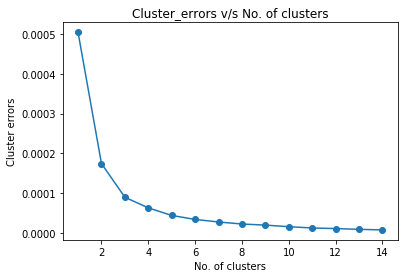

In [20]:
# Elbow plot
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Title and axis
plt.xlabel('No. of clusters')
plt.ylabel('Cluster errors')
plt.title('Cluster_errors v/s No. of clusters')

In [21]:
# After No. of clusters=5, the cluster errors converge

num_clusters = 5  

k_means = KMeans(n_clusters = num_clusters)
k_means.fit(data_mat)

# Cluster label for each ticker
labels = k_means.labels_
cluster_labels = labels.tolist()
print('\ncluster_labels\n', cluster_labels)

# To find unique labels
unique_labels = list(set(cluster_labels))
print('\nunique_labels\n', unique_labels)

# Cluster centroids
cluster_centroids = np.array(k_means.cluster_centers_)
print('\ncluster_centroids\n', cluster_centroids)

# results
results = pd.DataFrame([data.index, labels]).T
results.columns = ['Ticker_index', 'Cluster_label']


# Dataframe with Ticker_name, Ticker_index, Cluster_label
tick_df = pd.DataFrame({'Ticker_name':tickers})
result_df = pd.DataFrame()
result_df = pd.concat([tick_df, results], axis=1)
#result_df

# Sort result_df by cluster label
sorted_df = result_df.sort_values('Cluster_label')
sorted_df



cluster_labels
 [3, 0, 0, 3, 1, 4, 3, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 4, 0, 3, 3, 4, 1, 1, 0, 3, 0, 1, 0, 4, 0, 1, 0, 0, 0, 0, 4, 0, 3, 1, 3, 3, 0, 1, 0, 1, 2, 4, 1, 1]

unique_labels
 [0, 1, 2, 3, 4]

cluster_centroids
 [[ 0.0004363   0.01215027]
 [ 0.00053971  0.01505344]
 [ 0.00211054  0.02356803]
 [ 0.00090185  0.01848972]
 [ 0.00055216  0.00986475]]


,Ticker_name,Ticker_index,Cluster_label
24,ICICIBANK.NS,24,0
28,INFY.NS,28,0
30,LT.NS,30,0
18,HEROMOTOCO.NS,18,0
32,M&M.NS,32,0
16,HCLTECH.NS,16,0
15,GAIL.NS,15,0
33,MARUTI.NS,33,0
34,NTPC.NS,34,0
35,ONGC.NS,35,0


In [22]:
from sklearn.metrics import pairwise_distances_argmin_min

closest_ticker_ids = []
ticker_indices_within_i_cluster = []

# Converting data_mat list
data_list = data_mat.tolist()
#print('type(data_list)', type(data_list))
#print('len(data_list)', len(data_list))
#print('data_list', data_list)

for i in range(0, num_clusters):
    
    clust_centroid = cluster_centroids[i]
    #print('\nCluster centroid for cluster {}'.format(i))
    #print(clust_centroid)
    
    ticker_indices_within_i_cluster = result_df.loc[result_df['Cluster_label'] == i, 'Ticker_index'].tolist()
    #print('\nTicker indices in cluster {}'.format(i))
    #print(ticker_indices_within_i_cluster)   

    one_cluster_data_mat = np.zeros((len(ticker_indices_within_i_cluster), cluster_centroids.shape[1]))
    #print('\nInitially one_cluster_data_mat has zero values\n', one_cluster_data_mat)
    
    for row_num, data_idx in enumerate(ticker_indices_within_i_cluster):
        one_row = data_mat[data_idx]
        #print('\none_row', one_row)
        one_cluster_data_mat[row_num] = one_row
        #print('\none_cluster_data_mat[row_num]', one_cluster_data_mat)
    #print('\n')    
    #print('one_cluster_data_mat filled with co-ordinates of ticker_ids of a cluster\n', one_cluster_data_mat)

    closest, distances = pairwise_distances_argmin_min(clust_centroid.reshape(1, -1), one_cluster_data_mat)    
    closest_idx_in_one_cluster_data_mat = closest[0]
    closest_data_row_num = ticker_indices_within_i_cluster[closest_idx_in_one_cluster_data_mat]    
    #print('\nclosest_data_row_num', closest_data_row_num)
    
    data_id = data_mat[closest_data_row_num]
    data_id_list = data_id.tolist()
    #print('\ndata_id_list', data_id_list)
    #print('\ntype(data_id_list)', type(data_id_list))    
   
    ticker_id = data_list.index(data_id_list)
    #print('\nticker_id', ticker_id)
   
    closest_ticker_ids.append(ticker_id)


In [23]:
print('\n\n*************** We can create stock-portfolio of the below ticker_ids ***************')
print('\nFor cluster numbers 0,1,2,3,4 ticker_ids closest to their respective cluster_centroids are {}'.format(closest_ticker_ids))




*************** We can create stock-portfolio of the below ticker_ids ***************

For cluster numbers 0,1,2,3,4 ticker_ids closest to their respective cluster_centroids are [1, 4, 46, 0, 21]


In [24]:
# ticker_names
ticker_names = pd.DataFrame()

for ticker_id in closest_ticker_ids:
    temp = pd.DataFrame(result_df.loc[result_df['Ticker_index'] == ticker_id, 'Ticker_name'])
    #print(temp)
    ticker_names = ticker_names.append(temp)

ticker_names = ticker_names.reset_index()
ticker_names.columns = ['Ticker_index', 'Ticker_name']

ticker_names

,Ticker_index,Ticker_name
0,1,AMBUJACEM.NS
1,4,AXISBANK.NS
2,46,VEDL.NS
3,0,ADANIPORTS.NS
4,21,HINDUNILVR.NS


In [25]:
# Writing the ticker names of the portfolio into .csv file

ticker_names.to_csv('Portfolio_stocks.csv')

# Data preparation for Visualization and Model building

In [26]:
trading_tickers = pd.read_csv('Portfolio_stocks.csv')
trading_tickers

,Unnamed: 0,Ticker_index,Ticker_name
0,0,1,AMBUJACEM.NS
1,1,4,AXISBANK.NS
2,2,46,VEDL.NS
3,3,0,ADANIPORTS.NS
4,4,21,HINDUNILVR.NS


In [27]:
tickers_for_model = trading_tickers.Ticker_name.tolist()
tickers_for_model

['AMBUJACEM.NS', 'AXISBANK.NS', 'VEDL.NS', 'ADANIPORTS.NS', 'HINDUNILVR.NS']

In [28]:
# Taking 3 years of historic data

start_date = '2015-01-01'
end_date = '2018-01-01'

In [29]:
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='D')
all_weekdays

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
               '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30',
               '2017-12-31', '2018-01-01'],
              dtype='datetime64[ns]', length=1097, freq='D')

In [30]:
# NIFTY 50 (^NSEI)

nse =  pdr.get_data_yahoo('^NSEI', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [31]:
nse.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900
2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200
2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800
2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100
2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800


In [32]:
nse = nse.reindex(all_weekdays)
nse.head()

,Open,High,Low,Close,Adj Close,Volume
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900.0
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200.0


In [33]:
nse.rename(columns={'Adj Close': 'NSE'}, inplace=True)
nse.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
nse.head()

,NSE
2015-01-01,NaN
2015-01-02,8395.450195
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,8378.400391


In [34]:
# S&P 500 (^GSPC)

spy =  pdr.get_data_yahoo('^GSPC', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [35]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,2082.110107,2085.580078,2057.939941,2058.899902,2058.899902,-1688897296
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,-1586267296
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,-495847296
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,165142704
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,-489487296


In [36]:
spy = spy.reindex(all_weekdays)
spy.head()

,Open,High,Low,Close,Adj Close,Volume
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,-1.586267e+09
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,-4.958473e+08


In [37]:
spy.rename(columns={'Adj Close': 'SPY'}, inplace=True)
spy.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
spy.head()

,SPY
2015-01-01,NaN
2015-01-02,2058.199951
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,2020.579956


In [38]:
# Dow Jones Industrial Average (^DJI)

dji =  pdr.get_data_yahoo('^DJI', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [39]:
dji.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,17987.660156,18043.220703,17820.880859,17823.070313,17823.070313,82840000
2015-01-02,17823.070313,17951.779297,17731.300781,17832.990234,17832.990234,76270000
2015-01-05,17821.300781,17821.300781,17475.929688,17501.650391,17501.650391,116160000
2015-01-06,17504.179688,17581.050781,17262.369141,17371.640625,17371.640625,101870000
2015-01-07,17374.779297,17597.080078,17374.779297,17584.519531,17584.519531,91030000


In [40]:
dji = dji.reindex(all_weekdays)
dji.head()

,Open,High,Low,Close,Adj Close,Volume
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,17823.070313,17951.779297,17731.300781,17832.990234,17832.990234,76270000.0
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,17821.300781,17821.300781,17475.929688,17501.650391,17501.650391,116160000.0


In [41]:
dji.rename(columns={'Adj Close': 'DJ'}, inplace=True)
dji.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
dji.head()

,DJ
2015-01-01,NaN
2015-01-02,17832.990234
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,17501.650391


In [42]:
# NASDAQ Composite (^IXIC)

nasdaq =  pdr.get_data_yahoo('^IXIC', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [43]:
nasdaq.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,4790.529785,4806.430176,4734.109863,4736.049805,4736.049805,1515600000
2015-01-02,4760.240234,4777.009766,4698.109863,4726.810059,4726.810059,1435150000
2015-01-05,4700.339844,4702.770020,4641.459961,4652.569824,4652.569824,1794470000
2015-01-06,4666.850098,4667.330078,4567.589844,4592.740234,4592.740234,-2127647296
2015-01-07,4626.839844,4652.720215,4613.899902,4650.470215,4650.470215,1957950000


In [44]:
nasdaq = nasdaq.reindex(all_weekdays)
nasdaq.head()

,Open,High,Low,Close,Adj Close,Volume
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,4760.240234,4777.009766,4698.109863,4726.810059,4726.810059,1.435150e+09
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,4700.339844,4702.770020,4641.459961,4652.569824,4652.569824,1.794470e+09


In [45]:
nasdaq.rename(columns={'Adj Close': 'NASDAQ'}, inplace=True)
nasdaq.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
nasdaq.head()

,NASDAQ
2015-01-01,NaN
2015-01-02,4726.810059
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,4652.569824


In [46]:
print('Fetching historic stock data for {}'.format(tickers_for_model[0]))

Fetching historic stock data for AMBUJACEM.NS


In [47]:
stock1_df =  pdr.get_data_yahoo(tickers_for_model[0], start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [48]:
stock1_df = stock1_df.reindex(all_weekdays)
stock1_df.head()

,Open,High,Low,Close,Adj Close,Volume
2015-01-01,229.000000,229.449997,227.500000,227.750000,217.230316,208341.0
2015-01-02,228.000000,231.699997,228.000000,230.949997,220.282516,582581.0
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,230.949997,233.300003,229.550003,230.649994,219.996368,967248.0


In [49]:
stock1_df = stock1_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock1_df = stock1_df.fillna(method='ffill')

# Backward fill
stock1_df = stock1_df.fillna(method = 'bfill')

stock1_df.head()

,Open,High,Low,Close,Adj Close,Volume,NSE,SPY,DJ,NASDAQ
2015-01-01,229.000000,229.449997,227.500000,227.750000,217.230316,208341.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-02,228.000000,231.699997,228.000000,230.949997,220.282516,582581.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-03,228.000000,231.699997,228.000000,230.949997,220.282516,582581.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-04,228.000000,231.699997,228.000000,230.949997,220.282516,582581.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-05,230.949997,233.300003,229.550003,230.649994,219.996368,967248.0,8378.400391,2020.579956,17501.650391,4652.569824


In [50]:
print('Fetching historic stock data for {}'.format(tickers_for_model[1]))

Fetching historic stock data for AXISBANK.NS


In [51]:
stock2_df =  pdr.get_data_yahoo(tickers_for_model[1], start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [52]:
stock2_df = stock2_df.reindex(all_weekdays)
stock2_df.head()

,Open,High,Low,Close,Adj Close,Volume
2015-01-01,502.649994,504.000000,499.049988,503.049988,489.603394,1351985.0
2015-01-02,503.200012,516.900024,501.700012,514.299988,500.552704,3852825.0
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,516.900024,520.400024,515.099976,517.549988,503.715820,2561430.0


In [53]:
stock2_df = stock2_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock2_df = stock2_df.fillna(method='ffill')

# Backward fill
stock2_df = stock2_df.fillna(method = 'bfill')

stock2_df.head()

,Open,High,Low,Close,Adj Close,Volume,NSE,SPY,DJ,NASDAQ
2015-01-01,502.649994,504.000000,499.049988,503.049988,489.603394,1351985.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-02,503.200012,516.900024,501.700012,514.299988,500.552704,3852825.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-03,503.200012,516.900024,501.700012,514.299988,500.552704,3852825.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-04,503.200012,516.900024,501.700012,514.299988,500.552704,3852825.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-05,516.900024,520.400024,515.099976,517.549988,503.715820,2561430.0,8378.400391,2020.579956,17501.650391,4652.569824


In [54]:
print('Fetching historic stock data for {}'.format(tickers_for_model[2]))

Fetching historic stock data for VEDL.NS


In [55]:
stock3_df =  pdr.get_data_yahoo(tickers_for_model[2], start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [56]:
stock3_df = stock3_df.reindex(all_weekdays)
stock3_df.head()

,Open,High,Low,Close,Adj Close,Volume
2015-01-01,213.699997,219.699997,212.199997,219.250000,178.130081,2304326.0
2015-01-02,219.350006,224.449997,219.350006,222.300003,180.608093,3270358.0
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,222.500000,225.300003,218.100006,219.800003,178.576935,3512083.0


In [57]:
stock3_df = stock3_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock3_df = stock3_df.fillna(method='ffill')

# Backward fill
stock3_df = stock3_df.fillna(method = 'bfill')

stock3_df.head()

,Open,High,Low,Close,Adj Close,Volume,NSE,SPY,DJ,NASDAQ
2015-01-01,213.699997,219.699997,212.199997,219.250000,178.130081,2304326.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-02,219.350006,224.449997,219.350006,222.300003,180.608093,3270358.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-03,219.350006,224.449997,219.350006,222.300003,180.608093,3270358.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-04,219.350006,224.449997,219.350006,222.300003,180.608093,3270358.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-05,222.500000,225.300003,218.100006,219.800003,178.576935,3512083.0,8378.400391,2020.579956,17501.650391,4652.569824


In [58]:
print('Fetching historic stock data for {}'.format(tickers_for_model[3]))

Fetching historic stock data for ADANIPORTS.NS


In [59]:
stock4_df =  pdr.get_data_yahoo(tickers_for_model[3], start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [60]:
stock4_df = stock4_df.reindex(all_weekdays)
stock4_df.head()

,Open,High,Low,Close,Adj Close,Volume
2015-01-01,319.000000,322.500000,316.250000,319.549988,316.062469,1456204.0
2015-01-02,319.350006,325.799988,318.049988,319.350006,315.864655,2894058.0
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,320.450012,327.500000,319.350006,323.799988,320.266083,2099786.0


In [61]:
stock4_df = stock4_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock4_df = stock4_df.fillna(method='ffill')

# Backward fill
stock4_df = stock4_df.fillna(method = 'bfill')

stock4_df.head()

,Open,High,Low,Close,Adj Close,Volume,NSE,SPY,DJ,NASDAQ
2015-01-01,319.000000,322.500000,316.250000,319.549988,316.062469,1456204.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-02,319.350006,325.799988,318.049988,319.350006,315.864655,2894058.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-03,319.350006,325.799988,318.049988,319.350006,315.864655,2894058.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-04,319.350006,325.799988,318.049988,319.350006,315.864655,2894058.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-05,320.450012,327.500000,319.350006,323.799988,320.266083,2099786.0,8378.400391,2020.579956,17501.650391,4652.569824


In [62]:
print('Fetching historic stock data for {}'.format(tickers_for_model[4]))

Fetching historic stock data for HINDUNILVR.NS


In [63]:
stock5_df =  pdr.get_data_yahoo(tickers_for_model[4], start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [64]:
stock5_df = stock5_df.reindex(all_weekdays)
stock5_df.head()

,Open,High,Low,Close,Adj Close,Volume
2015-01-01,759.299988,761.900024,754.150024,758.450012,718.860352,372132.0
2015-01-02,757.000000,766.000000,752.650024,755.950012,716.490784,1207322.0
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,759.750000,761.900024,755.099976,760.299988,720.613708,849252.0


In [65]:
stock5_df = stock5_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock5_df = stock5_df.fillna(method='ffill')

# Backward fill
stock5_df = stock5_df.fillna(method = 'bfill')

stock5_df.head()

,Open,High,Low,Close,Adj Close,Volume,NSE,SPY,DJ,NASDAQ
2015-01-01,759.299988,761.900024,754.150024,758.450012,718.860352,372132.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-02,757.000000,766.000000,752.650024,755.950012,716.490784,1207322.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-03,757.000000,766.000000,752.650024,755.950012,716.490784,1207322.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-04,757.000000,766.000000,752.650024,755.950012,716.490784,1207322.0,8395.450195,2058.199951,17832.990234,4726.810059
2015-01-05,759.750000,761.900024,755.099976,760.299988,720.613708,849252.0,8378.400391,2020.579956,17501.650391,4652.569824


In [66]:
# Instantiating technical_indicators() object
tech_ind = ti.technical_indicators()

In [67]:
stock1_df = tech_ind.pcod(stock1_df)
stock1_df = tech_ind.hld(stock1_df)
stock1_df = tech_ind.stockRsi(stock1_df, numOfDays=14)
stock1_df = tech_ind.bbands(stock1_df, length=20, numsd=2) 
stock1_df = tech_ind.stma(stock1_df, numOfDays=10) # tentatively numOfDays=10 since this is a small dataset
stock1_df = tech_ind.ltma(stock1_df, numOfDays=20) # tentatively numOfDays=20 since this is a small dataset
stock1_df = tech_ind.scul(stock1_df)
stock1_df = tech_ind.scll(stock1_df)

In [68]:
stock1_df.head(50)

,Open,High,Low,Close,Adj Close,Volume,NSE,SPY,DJ,NASDAQ,pcod,hld,rsi,bbul,bbll,stma,ltma,scul,scll
2015-01-01,229.000000,229.449997,227.500000,227.750000,217.230316,208341.0,8395.450195,2058.199951,17832.990234,4726.810059,NaN,1.949997,NaN,NaN,NaN,NaN,NaN,0,0
2015-01-02,228.000000,231.699997,228.000000,230.949997,220.282516,582581.0,8395.450195,2058.199951,17832.990234,4726.810059,0.250000,3.699997,NaN,NaN,NaN,NaN,NaN,0,0
2015-01-03,228.000000,231.699997,228.000000,230.949997,220.282516,582581.0,8395.450195,2058.199951,17832.990234,4726.810059,-2.949997,3.699997,NaN,NaN,NaN,NaN,NaN,0,0
2015-01-04,228.000000,231.699997,228.000000,230.949997,220.282516,582581.0,8395.450195,2058.199951,17832.990234,4726.810059,-2.949997,3.699997,NaN,NaN,NaN,NaN,NaN,0,0
2015-01-05,230.949997,233.300003,229.550003,230.649994,219.996368,967248.0,8378.400391,2020.579956,17501.650391,4652.569824,0.000000,3.750000,NaN,NaN,NaN,NaN,NaN,0,0
2015-01-06,230.000000,230.000000,220.750000,222.149994,211.888992,1479156.0,8127.350098,2002.609985,17371.640625,4592.740234,-0.649994,9.250000,NaN,NaN,NaN,NaN,NaN,0,0
2015-01-07,222.000000,222.949997,218.100006,220.100006,209.933685,1172388.0,8102.100098,2025.900024,17584.519531,4650.470215,-0.149994,4.849991,NaN,NaN,NaN,NaN,NaN,0,0
2015-01-08,221.949997,227.500000,221.199997,226.399994,215.942703,1084102.0,8234.599609,2062.139893,17907.869141,4736.189941,1.849991,6.300003,NaN,NaN,NaN,NaN,NaN,0,0
2015-01-09,226.699997,228.399994,222.050003,223.800003,213.462799,1225314.0,8284.500000,2044.810059,17737.369141,4704.069824,0.300003,6.349991,NaN,NaN,NaN,NaN,NaN,0,0
2015-01-10,226.699997,228.399994,222.050003,223.800003,213.462799,1225314.0,8284.500000,2044.810059,17737.369141,4704.069824,2.899994,6.349991,NaN,NaN,NaN,226.749999,NaN,0,0


In [69]:
stock1_df = tech_ind.stma_cuts_ltma(stock1_df)

In [70]:
stock1_df['stma_cut_ltma_b'].value_counts()

0    1067
1      30
Name: stma_cut_ltma_b, dtype: int64

In [71]:
stock1_df['stma_pr_cut_ltma_a'].value_counts()

0    1067
1      30
Name: stma_pr_cut_ltma_a, dtype: int64

In [72]:
stock1_df[stock1_df['stma_pr_cut_ltma_a'] == 1]

,Open,High,Low,Close,Adj Close,Volume,NSE,SPY,DJ,NASDAQ,...,hld,rsi,bbul,bbll,stma,ltma,scul,scll,stma_cut_ltma_b,stma_pr_cut_ltma_a
2015-02-07,246.100006,250.250000,246.000000,248.250000,236.783447,864075.0,8661.049805,2055.469971,17824.289063,4744.399902,...,4.250000,42.369832,254.604,244.216,248.930000,249.410000,0,0,0,1
2015-03-13,268.000000,268.750000,254.000000,256.000000,244.175476,1480291.0,8647.750000,2053.399902,17749.310547,4871.759766,...,14.750000,37.671847,283.613,251.322,267.120001,267.467502,0,0,0,1
2015-04-17,250.399994,250.949997,245.750000,246.850006,235.448135,1579668.0,8606.000000,2081.179932,17826.300781,4931.810059,...,5.199997,23.092375,264.892,249.998,256.319998,257.445000,0,1,0,1
2015-05-14,234.550003,237.550003,231.149994,235.050003,224.193130,1388619.0,8224.200195,2121.100098,18252.240234,5050.799805,...,6.400009,52.590430,240.702,226.413,233.454999,233.557499,0,0,0,1
2015-05-30,230.449997,239.800003,229.750000,237.600006,226.625366,3367891.0,8433.650391,2107.389893,18010.679688,5070.029785,...,10.050003,53.994502,245.465,226.335,235.785004,235.900001,0,0,0,1
2015-07-26,242.600006,245.699997,239.000000,240.149994,229.057571,1229746.0,8521.549805,2079.649902,17568.529297,5088.629883,...,6.699997,47.674415,256.309,235.811,245.670001,246.060001,0,0,0,1
2015-09-15,211.050003,211.600006,203.100006,204.399994,196.318344,5716055.0,7829.100098,1978.089966,16599.849609,4860.520020,...,8.500000,46.355339,215.527,202.613,208.704999,209.070000,0,0,0,1
2015-09-27,206.300003,208.899994,204.550003,207.000000,198.815552,4214954.0,7868.500000,1931.339966,16314.669922,4686.500000,...,4.349991,50.000000,212.649,204.676,208.370000,208.662499,0,0,0,1
2015-10-27,208.600006,210.000000,204.100006,205.399994,197.278824,4472757.0,8232.900391,2065.889893,17581.429688,5030.149902,...,5.899994,26.178002,212.568,206.692,209.144997,209.629996,0,1,0,1
2015-11-10,204.000000,204.399994,195.699997,196.699997,188.922806,5616108.0,7783.350098,2081.719971,17758.210938,5083.240234,...,8.699997,32.530154,213.736,201.794,207.510001,207.764999,0,1,0,1


In [73]:
stock1_df = tech_ind.close_cuts_stma(stock1_df)

roopA VALIDATION


In [74]:
stock1_df['close_pr_cut_stma_a'].value_counts()

0    1011
1      86
Name: close_pr_cut_stma_a, dtype: int64

In [75]:
stock1_df['close_pr_cut_stma_b'].value_counts()

0    1011
1      86
Name: close_pr_cut_stma_b, dtype: int64

In [76]:
tech_ind

In [77]:
stock1_df = tech_ind.close_cuts_ltma(stock1_df)

In [78]:
stock1_df['close_pr_cut_ltma_b'].value_counts()

0    1043
1      54
Name: close_pr_cut_ltma_b, dtype: int64

In [79]:
stock1_df['close_pr_cut_ltma_a'].value_counts()

0    1042
1      55
Name: close_pr_cut_ltma_a, dtype: int64

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2015-01-01  227.750000
1 2015-01-02  230.949997
2 2015-01-03  230.949997
3 2015-01-04  230.949997
4 2015-01-05  230.649994


          ds      y_orig         y
0 2015-01-01  227.750000  5.428249
1 2015-01-02  230.949997  5.442201
2 2015-01-03  230.949997  5.442201
3 2015-01-04  230.949997  5.442201
4 2015-01-05  230.649994  5.440901


             ds      yhat  yhat_lower  yhat_upper
1087 2017-12-23  5.596175    5.569432    5.625635
1088 2017-12-24  5.597208    5.567774    5.624803
1089 2017-12-25  5.599950    5.568703    5.628306
1090 2017-12-26  5.598936    5.568460    5.627996
1091 2017-12-27  5.601003    5.573304    5.628246
1092 2017-12-28  5.603412    5.578000    5.635512
1093 2017-12-29  5.604586    5.577569    5.636391
1094 2017-12-30  5.606035    5.574255    5.634879
1095 2017-12-31  5.607535    5.579355    5.637595
1096 2018-01-01  5.610755

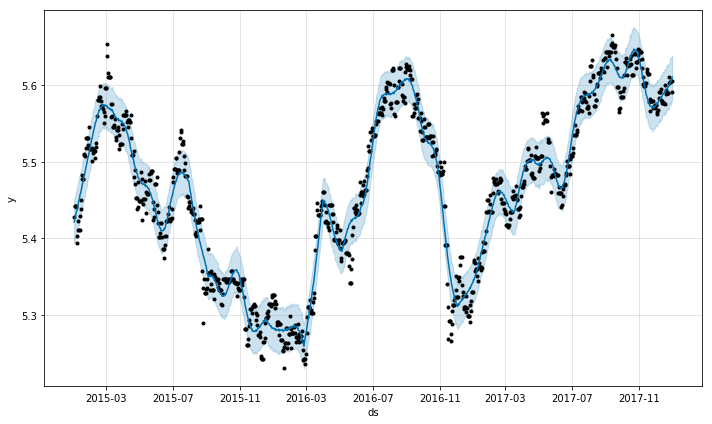

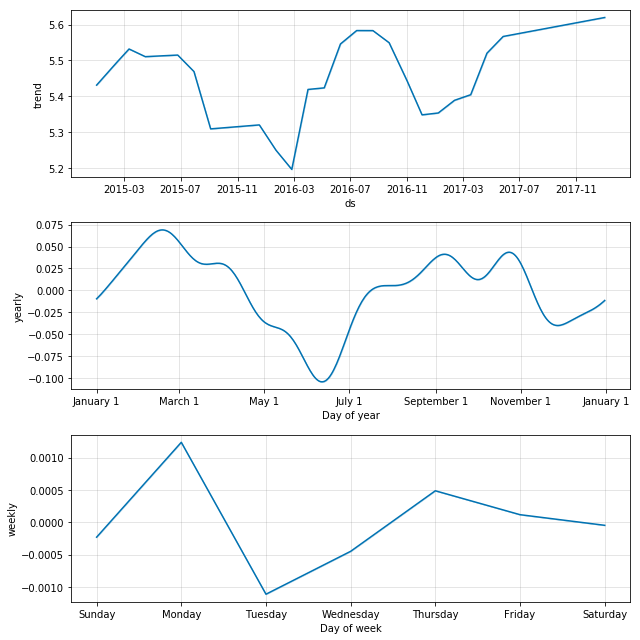

In [80]:

stock1_df = tech_ind.daily_returns(stock1_df)
stock1_df = tech_ind.daily_returns_NSE(stock1_df)
stock1_df = tech_ind.daily_returns_SPY(stock1_df)
stock1_df = tech_ind.daily_returns_DOWJONES(stock1_df)
stock1_df = tech_ind.daily_returns_NASDAQ(stock1_df)

stock1_df = tech_ind.vwap(stock1_df)
stock1_df = tech_ind.price_movement(stock1_df)
stock1_df = tech_ind.beta_values(stock1_df)

#time-series prediction for the stock using prophet
stock1_df.reset_index(inplace = True)
stock1_df = stock1_df.rename(columns={'index':'Date'})
stock1_df, ts_data1 = tech_ind.TS_close_price(stock1_df)

# Writing the stock1_df data to .csv file
stock1_df.to_csv('{}'.format(tickers_for_model[0]+'.csv'))


In [81]:
stock1_df.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,SPY,DJ,...,dr_stock,dr_nse,dr_spy,dr_dj,dr_nasdaq,vwap,price_movmnt,beta,ds,TS_close_pr
0,2015-01-01,229.000000,229.449997,227.500000,227.750000,217.230316,208341.0,8395.450195,2058.199951,17832.990234,...,NaN,NaN,NaN,NaN,NaN,227.75,NaN,NaN,2015-01-01,226.173274
1,2015-01-02,228.000000,231.699997,228.000000,230.949997,220.282516,582581.0,8395.450195,2058.199951,17832.990234,...,0.014051,0.000000,0.000000,0.000000,0.000000,230.95,1.0,NaN,2015-01-02,226.774322
2,2015-01-03,228.000000,231.699997,228.000000,230.949997,220.282516,582581.0,8395.450195,2058.199951,17832.990234,...,0.000000,0.000000,0.000000,0.000000,0.000000,230.95,1.0,NaN,2015-01-03,227.437515
3,2015-01-04,228.000000,231.699997,228.000000,230.949997,220.282516,582581.0,8395.450195,2058.199951,17832.990234,...,0.000000,0.000000,0.000000,0.000000,0.000000,230.95,1.0,NaN,2015-01-04,228.111087
4,2015-01-05,230.949997,233.300003,229.550003,230.649994,219.996368,967248.0,8378.400391,2020.579956,17501.650391,...,-0.001299,-0.002031,-0.018278,-0.018580,-0.015706,230.65,0.0,0.6396,2015-01-05,229.176521
5,2015-01-06,230.000000,230.000000,220.750000,222.149994,211.888992,1479156.0,8127.350098,2002.609985,17371.640625,...,-0.036852,-0.029964,-0.008893,-0.007428,-0.012859,222.15,0.0,1.2299,2015-01-06,229.379422
6,2015-01-07,222.000000,222.949997,218.100006,220.100006,209.933685,1172388.0,8102.100098,2025.900024,17584.519531,...,-0.009228,-0.003107,0.011630,0.012254,0.012570,220.10,0.0,2.9703,2015-01-07,230.284616
7,2015-01-08,221.949997,227.500000,221.199997,226.399994,215.942703,1084102.0,8234.599609,2062.139893,17907.869141,...,0.028623,0.016354,0.017888,0.018388,0.018432,226.40,1.0,1.7503,2015-01-08,231.263959
8,2015-01-09,226.699997,228.399994,222.050003,223.800003,213.462799,1225314.0,8284.500000,2044.810059,17737.369141,...,-0.011484,0.006060,-0.008404,-0.009521,-0.006782,223.80,0.0,-1.8951,2015-01-09,231.950265
9,2015-01-10,226.699997,228.399994,222.050003,223.800003,213.462799,1225314.0,8284.500000,2044.810059,17737.369141,...,0.000000,0.000000,0.000000,0.000000,0.000000,223.80,1.0,NaN,2015-01-10,232.691118


Original 'Close' price data


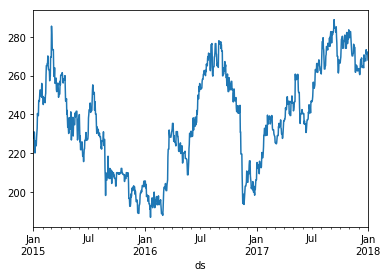

In [82]:
# time-series projections of the close price

print("Original 'Close' price data")
ts_data1.set_index('ds').y_orig.plot()

log-transformed 'Close' price data


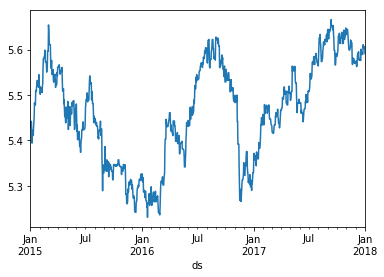

In [83]:
print("log-transformed 'Close' price data")
ts_data1.set_index('ds').y.plot()

time-series log-transformed 'Close' price data


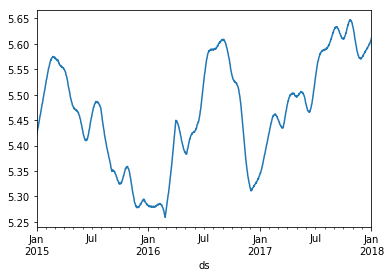

In [84]:
print("time-series log-transformed 'Close' price data")
ts_data1.set_index('ds').yhat.plot()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


roopA VALIDATION


0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2015-01-01  503.049988
1 2015-01-02  514.299988
2 2015-01-03  514.299988
3 2015-01-04  514.299988
4 2015-01-05  517.549988


          ds      y_orig         y
0 2015-01-01  503.049988  6.220690
1 2015-01-02  514.299988  6.242807
2 2015-01-03  514.299988  6.242807
3 2015-01-04  514.299988  6.242807
4 2015-01-05  517.549988  6.249106


             ds      yhat  yhat_lower  yhat_upper
1087 2017-12-23  6.318859    6.282017    6.353387
1088 2017-12-24  6.319528    6.285808    6.351675
1089 2017-12-25  6.319631    6.285304    6.356823
1090 2017-12-26  6.320488    6.285347    6.355355
1091 2017-12-27  6.319750    6.283010    6.355713
1092 2017-12-28  6.320075    6.284666    6.352424
1093 2017-12-29  6.321226    6.287276    6.358097
1094 2017-12-30  6.321109    6.286883    6.356673
1095 2017-12-31  6.320893    6.285590    6.355707
1096 201

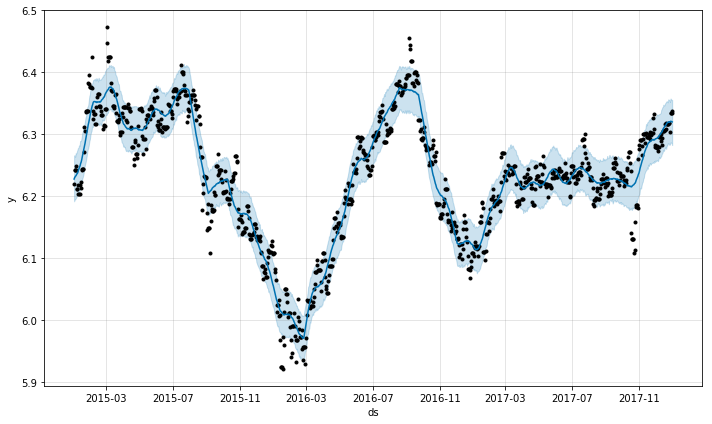

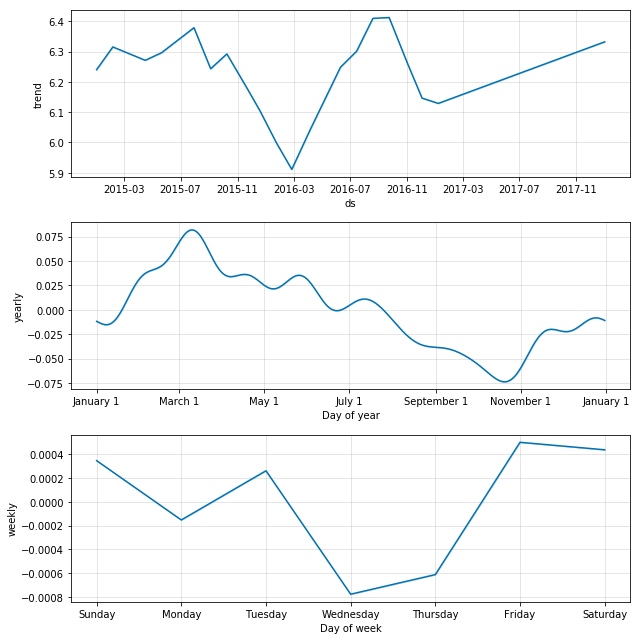

In [85]:
# Calling technical indicator functions for stock2_df

stock2_df = tech_ind.pcod(stock2_df)
stock2_df = tech_ind.hld(stock2_df)
stock2_df = tech_ind.stockRsi(stock2_df, numOfDays=14)
stock2_df = tech_ind.bbands(stock2_df, length=20, numsd=2) 
stock2_df = tech_ind.stma(stock2_df, numOfDays=10) # tentatively numOfDays=10 since this is a small dataset
stock2_df = tech_ind.ltma(stock2_df, numOfDays=20) # tentatively numOfDays=20 since this is a small dataset
stock2_df = tech_ind.ema(stock2_df, numOfDays=20)
stock2_df = tech_ind.scul(stock2_df)
stock2_df = tech_ind.scll(stock2_df)

#### Few modifications done to the below 3 functions
stock2_df = tech_ind.stma_cuts_ltma(stock2_df)
stock2_df = tech_ind.close_cuts_stma(stock2_df)
stock2_df = tech_ind.close_cuts_ltma(stock2_df)

stock2_df = tech_ind.daily_returns(stock2_df)
stock2_df = tech_ind.daily_returns_NSE(stock2_df)
stock2_df = tech_ind.daily_returns_SPY(stock2_df)
stock2_df = tech_ind.daily_returns_DOWJONES(stock2_df)
stock2_df = tech_ind.daily_returns_NASDAQ(stock2_df)

stock2_df = tech_ind.vwap(stock2_df)
stock2_df = tech_ind.price_movement(stock2_df)
stock2_df = tech_ind.beta_values(stock2_df)

#time-series prediction for the stock using prophet
stock2_df.reset_index(inplace = True)
stock2_df = stock2_df.rename(columns={'index':'Date'})
stock2_df, ts_data2 = tech_ind.TS_close_price(stock2_df)

# Writing the stock2_df data to .csv file
stock2_df.to_csv('{}'.format(tickers_for_model[1]+'.csv'))


In [86]:
stock2_df.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,SPY,DJ,...,dr_stock,dr_nse,dr_spy,dr_dj,dr_nasdaq,vwap,price_movmnt,beta,ds,TS_close_pr
0,2015-01-01,502.649994,504.000000,499.049988,503.049988,489.603394,1351985.0,8395.450195,2058.199951,17832.990234,...,NaN,NaN,NaN,NaN,NaN,503.05,NaN,NaN,2015-01-01,506.762743
1,2015-01-02,503.200012,516.900024,501.700012,514.299988,500.552704,3852825.0,8395.450195,2058.199951,17832.990234,...,0.022364,0.000000,0.000000,0.000000,0.000000,514.30,1.0,NaN,2015-01-02,508.034509
2,2015-01-03,503.200012,516.900024,501.700012,514.299988,500.552704,3852825.0,8395.450195,2058.199951,17832.990234,...,0.000000,0.000000,0.000000,0.000000,0.000000,514.30,1.0,NaN,2015-01-03,508.719454
3,2015-01-04,503.200012,516.900024,501.700012,514.299988,500.552704,3852825.0,8395.450195,2058.199951,17832.990234,...,0.000000,0.000000,0.000000,0.000000,0.000000,514.30,1.0,NaN,2015-01-04,509.414161
4,2015-01-05,516.900024,520.400024,515.099976,517.549988,503.715820,2561430.0,8378.400391,2020.579956,17501.650391,...,0.006319,-0.002031,-0.018278,-0.018580,-0.015706,517.55,1.0,-3.1116,2015-01-05,509.942823
5,2015-01-06,513.549988,513.549988,496.750000,499.049988,485.710327,5284530.0,8127.350098,2002.609985,17371.640625,...,-0.035745,-0.029964,-0.008893,-0.007428,-0.012859,499.05,0.0,1.1929,2015-01-06,510.993499
6,2015-01-07,498.799988,505.350006,494.500000,498.649994,485.321045,4245189.0,8102.100098,2025.900024,17584.519531,...,-0.000801,-0.003107,0.011630,0.012254,0.012570,498.65,0.0,0.2580,2015-01-07,511.379505
7,2015-01-08,506.000000,507.000000,494.649994,501.950012,488.532837,5637844.0,8234.599609,2062.139893,17907.869141,...,0.006618,0.016354,0.017888,0.018388,0.018432,501.95,1.0,0.4047,2015-01-08,512.467787
8,2015-01-09,504.899994,505.899994,487.000000,494.950012,481.719940,5078463.0,8284.500000,2044.810059,17737.369141,...,-0.013946,0.006060,-0.008404,-0.009521,-0.006782,494.95,0.0,-2.3013,2015-01-09,514.145445
9,2015-01-10,504.899994,505.899994,487.000000,494.950012,481.719940,5078463.0,8284.500000,2044.810059,17737.369141,...,0.000000,0.000000,0.000000,0.000000,0.000000,494.95,1.0,NaN,2015-01-10,515.338377


Original 'Close' price data


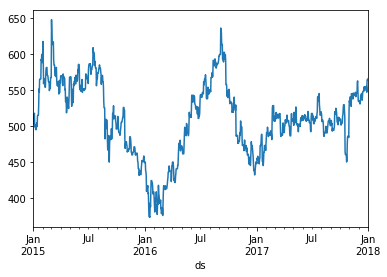

In [87]:
# time-series projections of the close price

print("Original 'Close' price data")
ts_data2.set_index('ds').y_orig.plot()

log-transformed 'Close' price data


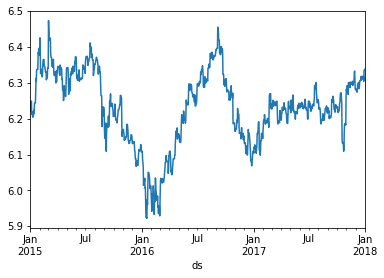

In [88]:
print("log-transformed 'Close' price data")
ts_data2.set_index('ds').y.plot()

time-series log-transformed 'Close' price data


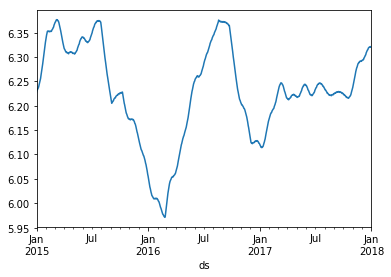

In [89]:
print("time-series log-transformed 'Close' price data")
ts_data2.set_index('ds').yhat.plot()

roopA VALIDATION


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2015-01-01  219.250000
1 2015-01-02  222.300003
2 2015-01-03  222.300003
3 2015-01-04  222.300003
4 2015-01-05  219.800003


          ds      y_orig         y
0 2015-01-01  219.250000  5.390213
1 2015-01-02  222.300003  5.404028
2 2015-01-03  222.300003  5.404028
3 2015-01-04  222.300003  5.404028
4 2015-01-05  219.800003  5.392718


             ds      yhat  yhat_lower  yhat_upper
1087 2017-12-23  5.724504    5.663451    5.785734
1088 2017-12-24  5.725067    5.664919    5.788249
1089 2017-12-25  5.726494    5.662841    5.787962
1090 2017-12-26  5.725064    5.666159    5.788222
1091 2017-12-27  5.723720    5.658715    5.789376
1092 2017-12-28  5.725148    5.666458    5.786828
1093 2017-12-29  5.724835    5.667130    5.789379
1094 2017-12-30  5.723001    5.662505    5.783122
1095 2017-12-31  5.720662    5.657604    5.780210
1096 2018-01-01  5.718910

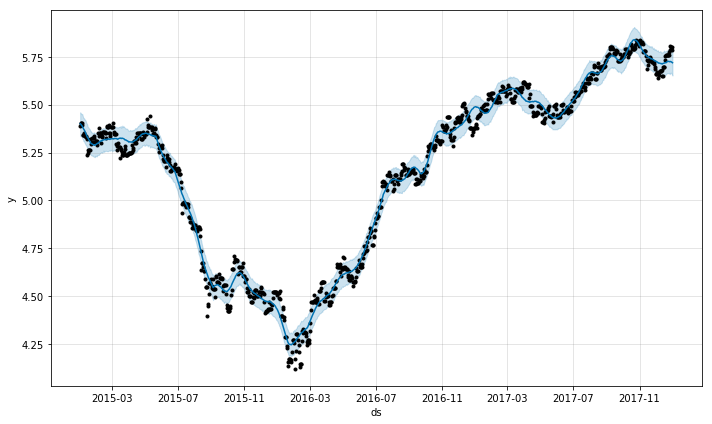

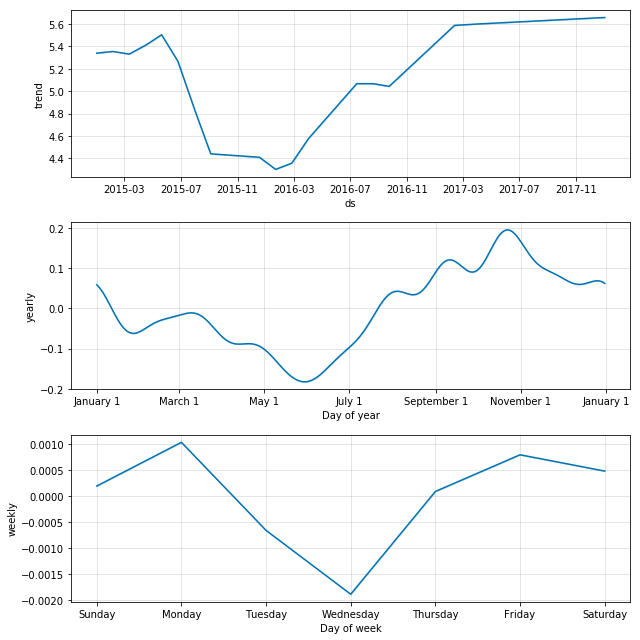

In [90]:
# Calling technical indicator functions for stock3_df

stock3_df = tech_ind.pcod(stock3_df)
stock3_df = tech_ind.hld(stock3_df)
stock3_df = tech_ind.stockRsi(stock3_df, numOfDays=14)
stock3_df = tech_ind.bbands(stock3_df, length=20, numsd=2) 
stock3_df = tech_ind.stma(stock3_df, numOfDays=10) # tentatively numOfDays=10 since this is a small dataset
stock3_df = tech_ind.ltma(stock3_df, numOfDays=20) # tentatively numOfDays=20 since this is a small dataset
stock3_df = tech_ind.ema(stock3_df, numOfDays=20)
stock3_df = tech_ind.scul(stock3_df)
stock3_df = tech_ind.scll(stock3_df)

#### Few modifications done to the below 3 functions
stock3_df = tech_ind.stma_cuts_ltma(stock3_df)
stock3_df = tech_ind.close_cuts_stma(stock3_df)
stock3_df = tech_ind.close_cuts_ltma(stock3_df)

stock3_df = tech_ind.daily_returns(stock3_df)
stock3_df = tech_ind.daily_returns_NSE(stock3_df)
stock3_df = tech_ind.daily_returns_SPY(stock3_df)
stock3_df = tech_ind.daily_returns_DOWJONES(stock3_df)
stock3_df = tech_ind.daily_returns_NASDAQ(stock3_df)

stock3_df = tech_ind.vwap(stock3_df)
stock3_df = tech_ind.price_movement(stock3_df)
stock3_df = tech_ind.beta_values(stock3_df)

#time-series prediction for the stock using prophet
stock3_df.reset_index(inplace = True)
stock3_df = stock3_df.rename(columns={'index':'Date'})
stock3_df, ts_data3 = tech_ind.TS_close_price(stock3_df)

# Writing the stock3_df data to .csv file
stock3_df.to_csv('{}'.format(tickers_for_model[2]+'.csv'))

In [91]:
stock3_df.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,SPY,DJ,...,dr_stock,dr_nse,dr_spy,dr_dj,dr_nasdaq,vwap,price_movmnt,beta,ds,TS_close_pr
0,2015-01-01,213.699997,219.699997,212.199997,219.250000,178.130081,2304326.0,8395.450195,2058.199951,17832.990234,...,NaN,NaN,NaN,NaN,NaN,219.25,NaN,NaN,2015-01-01,221.442833
1,2015-01-02,219.350006,224.449997,219.350006,222.300003,180.608093,3270358.0,8395.450195,2058.199951,17832.990234,...,0.013911,0.000000,0.000000,0.000000,0.000000,222.30,1.0,NaN,2015-01-02,220.984596
2,2015-01-03,219.350006,224.449997,219.350006,222.300003,180.608093,3270358.0,8395.450195,2058.199951,17832.990234,...,0.000000,0.000000,0.000000,0.000000,0.000000,222.30,1.0,NaN,2015-01-03,220.184002
3,2015-01-04,219.350006,224.449997,219.350006,222.300003,180.608093,3270358.0,8395.450195,2058.199951,17832.990234,...,0.000000,0.000000,0.000000,0.000000,0.000000,222.30,1.0,NaN,2015-01-04,219.276934
4,2015-01-05,222.500000,225.300003,218.100006,219.800003,178.576935,3512083.0,8378.400391,2020.579956,17501.650391,...,-0.011246,-0.002031,-0.018278,-0.018580,-0.015706,219.80,0.0,5.5377,2015-01-05,218.511828
5,2015-01-06,217.949997,219.500000,206.750000,209.050003,169.843109,6095798.0,8127.350098,2002.609985,17371.640625,...,-0.048908,-0.029964,-0.008893,-0.007428,-0.012859,209.05,0.0,1.6322,2015-01-06,217.099015
6,2015-01-07,209.000000,211.850006,204.149994,209.000000,169.802460,3410940.0,8102.100098,2025.900024,17584.519531,...,-0.000239,-0.003107,0.011630,0.012254,0.012570,209.00,0.0,0.0770,2015-01-07,215.707459
7,2015-01-08,211.300003,212.649994,205.550003,210.500000,171.021149,3956233.0,8234.599609,2062.139893,17907.869141,...,0.007177,0.016354,0.017888,0.018388,0.018432,210.50,1.0,0.4389,2015-01-08,214.936081
8,2015-01-09,213.899994,213.899994,206.600006,207.800003,168.827515,2842333.0,8284.500000,2044.810059,17737.369141,...,-0.012827,0.006060,-0.008404,-0.009521,-0.006782,207.80,0.0,-2.1167,2015-01-09,213.834008
9,2015-01-10,213.899994,213.899994,206.600006,207.800003,168.827515,2842333.0,8284.500000,2044.810059,17737.369141,...,0.000000,0.000000,0.000000,0.000000,0.000000,207.80,1.0,NaN,2015-01-10,212.474939


Original 'Close' price data


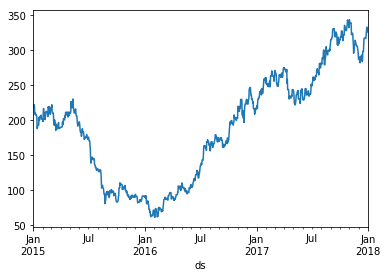

In [92]:
# time-series projections of the close price

print("Original 'Close' price data")
ts_data3.set_index('ds').y_orig.plot()

log-transformed 'Close' price data


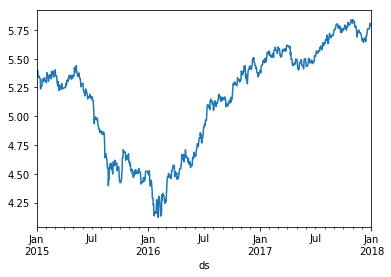

In [93]:
print("log-transformed 'Close' price data")
ts_data3.set_index('ds').y.plot()

time-series log-transformed 'Close' price data


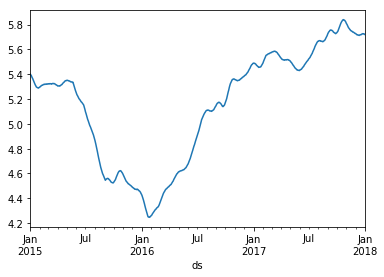

In [94]:
print("time-series log-transformed 'Close' price data")
ts_data3.set_index('ds').yhat.plot()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


roopA VALIDATION


0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2015-01-01  319.549988
1 2015-01-02  319.350006
2 2015-01-03  319.350006
3 2015-01-04  319.350006
4 2015-01-05  323.799988


          ds      y_orig         y
0 2015-01-01  319.549988  5.766914
1 2015-01-02  319.350006  5.766288
2 2015-01-03  319.350006  5.766288
3 2015-01-04  319.350006  5.766288
4 2015-01-05  323.799988  5.780126


             ds      yhat  yhat_lower  yhat_upper
1087 2017-12-23  6.001122    5.953825    6.047581
1088 2017-12-24  6.001494    5.955841    6.048072
1089 2017-12-25  6.002458    5.956962    6.053184
1090 2017-12-26  6.004698    5.956396    6.052150
1091 2017-12-27  6.004597    5.960164    6.051512
1092 2017-12-28  6.005306    5.958923    6.053775
1093 2017-12-29  6.006758    5.957278    6.054117
1094 2017-12-30  6.007935    5.959823    6.050433
1095 2017-12-31  6.009236    5.960491    6.057695
1096 201

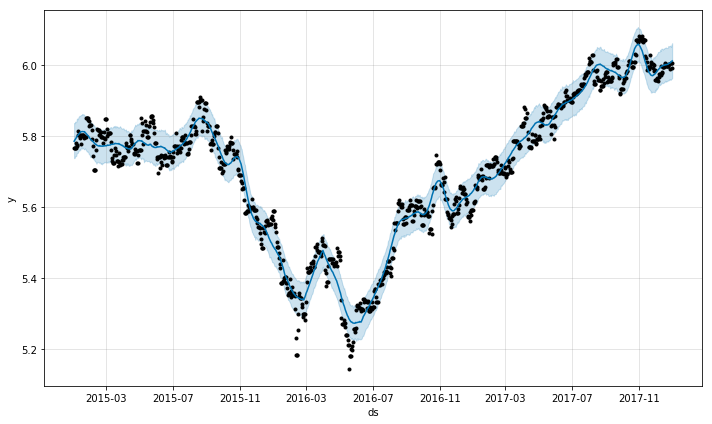

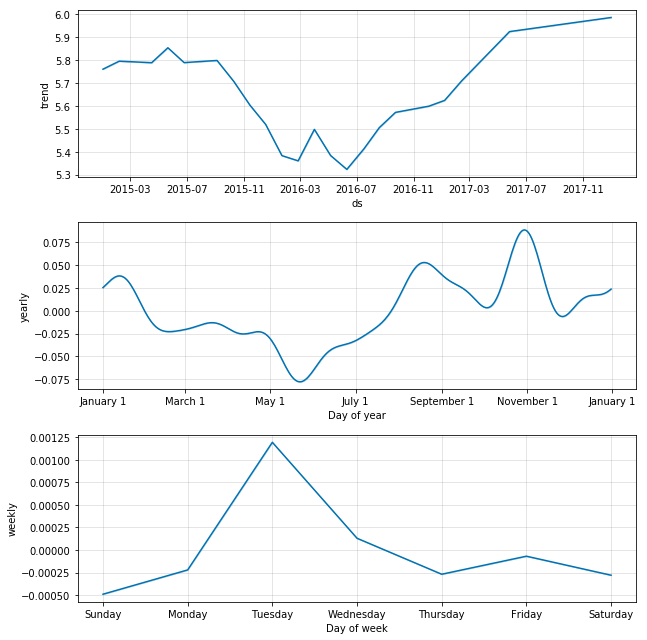

In [95]:
# Calling technical indicator functions for stock4_df

stock4_df = tech_ind.pcod(stock4_df)
stock4_df = tech_ind.hld(stock4_df)
stock4_df = tech_ind.stockRsi(stock4_df, numOfDays=14)
stock4_df = tech_ind.bbands(stock4_df, length=20, numsd=2) 
stock4_df = tech_ind.stma(stock4_df, numOfDays=10) # tentatively numOfDays=10 since this is a small dataset
stock4_df = tech_ind.ltma(stock4_df, numOfDays=20) # tentatively numOfDays=20 since this is a small dataset
stock4_df = tech_ind.ema(stock4_df, numOfDays=20)
stock4_df = tech_ind.scul(stock4_df)
stock4_df = tech_ind.scll(stock4_df)

#### Few modifications done to the below 3 functions
stock4_df = tech_ind.stma_cuts_ltma(stock4_df)
stock4_df = tech_ind.close_cuts_stma(stock4_df)
stock4_df = tech_ind.close_cuts_ltma(stock4_df)

stock4_df = tech_ind.daily_returns(stock4_df)
stock4_df = tech_ind.daily_returns_NSE(stock4_df)
stock4_df = tech_ind.daily_returns_SPY(stock4_df)
stock4_df = tech_ind.daily_returns_DOWJONES(stock4_df)
stock4_df = tech_ind.daily_returns_NASDAQ(stock4_df)

stock4_df = tech_ind.vwap(stock4_df)
stock4_df = tech_ind.price_movement(stock4_df)
stock4_df = tech_ind.beta_values(stock4_df)

#time-series prediction for the stock using prophet
stock4_df.reset_index(inplace = True)
stock4_df = stock4_df.rename(columns={'index':'Date'})
stock4_df, ts_data4 = tech_ind.TS_close_price(stock4_df)

# Writing the stock4_df data to .csv file
stock4_df.to_csv('{}'.format(tickers_for_model[3]+'.csv'))

In [96]:
stock4_df.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,SPY,DJ,...,dr_stock,dr_nse,dr_spy,dr_dj,dr_nasdaq,vwap,price_movmnt,beta,ds,TS_close_pr
0,2015-01-01,319.000000,322.500000,316.250000,319.549988,316.062469,1456204.0,8395.450195,2058.199951,17832.990234,...,NaN,NaN,NaN,NaN,NaN,319.55,NaN,NaN,2015-01-01,325.372821
1,2015-01-02,319.350006,325.799988,318.049988,319.350006,315.864655,2894058.0,8395.450195,2058.199951,17832.990234,...,-0.000626,0.000000,0.000000,0.000000,0.000000,319.35,0.0,NaN,2015-01-02,326.220088
2,2015-01-03,319.350006,325.799988,318.049988,319.350006,315.864655,2894058.0,8395.450195,2058.199951,17832.990234,...,0.000000,0.000000,0.000000,0.000000,0.000000,319.35,1.0,NaN,2015-01-03,326.955646
3,2015-01-04,319.350006,325.799988,318.049988,319.350006,315.864655,2894058.0,8395.450195,2058.199951,17832.990234,...,0.000000,0.000000,0.000000,0.000000,0.000000,319.35,1.0,NaN,2015-01-04,327.703440
4,2015-01-05,320.450012,327.500000,319.350006,323.799988,320.266083,2099786.0,8378.400391,2020.579956,17501.650391,...,0.013935,-0.002031,-0.018278,-0.018580,-0.015706,323.80,1.0,-6.8615,2015-01-05,328.610061
5,2015-01-06,321.649994,331.450012,315.600006,321.850006,318.337372,3672197.0,8127.350098,2002.609985,17371.640625,...,-0.006022,-0.029964,-0.008893,-0.007428,-0.012859,321.85,0.0,0.2010,2015-01-06,329.884693
6,2015-01-07,321.950012,328.700012,317.399994,321.100006,317.595551,2981544.0,8102.100098,2025.900024,17584.519531,...,-0.002330,-0.003107,0.011630,0.012254,0.012570,321.10,0.0,0.7501,2015-01-07,330.319782
7,2015-01-08,326.000000,337.299988,323.549988,334.549988,330.898743,2932673.0,8234.599609,2062.139893,17907.869141,...,0.041887,0.016354,0.017888,0.018388,0.018432,334.55,1.0,2.5613,2015-01-08,330.938678
8,2015-01-09,339.899994,343.100006,327.350006,331.149994,327.535889,3543488.0,8284.500000,2044.810059,17737.369141,...,-0.010163,0.006060,-0.008404,-0.009521,-0.006782,331.15,0.0,-1.6771,2015-01-09,331.708344
9,2015-01-10,339.899994,343.100006,327.350006,331.149994,327.535889,3543488.0,8284.500000,2044.810059,17737.369141,...,0.000000,0.000000,0.000000,0.000000,0.000000,331.15,1.0,NaN,2015-01-10,332.282697


Original 'Close' price data


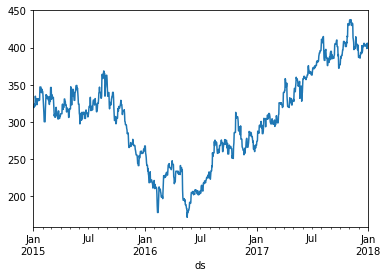

In [97]:
# time-series projections of the close price

print("Original 'Close' price data")
ts_data4.set_index('ds').y_orig.plot()

log-transformed 'Close' price data


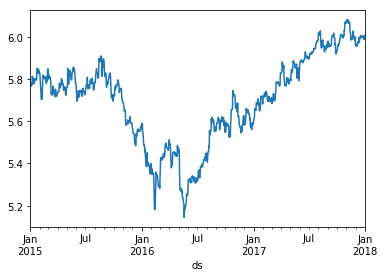

In [98]:
print("log-transformed 'Close' price data")
ts_data4.set_index('ds').y.plot()


time-series log-transformed 'Close' price data


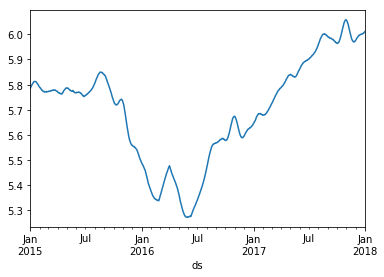

In [99]:
print("time-series log-transformed 'Close' price data")
ts_data4.set_index('ds').yhat.plot()

roopA VALIDATION


0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2015-01-01  758.450012
1 2015-01-02  755.950012
2 2015-01-03  755.950012
3 2015-01-04  755.950012
4 2015-01-05  760.299988


          ds      y_orig         y
0 2015-01-01  758.450012  6.631277
1 2015-01-02  755.950012  6.627975
2 2015-01-03  755.950012  6.627975
3 2015-01-04  755.950012  6.627975
4 2015-01-05  760.299988  6.633713


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




             ds      yhat  yhat_lower  yhat_upper
1087 2017-12-23  7.204744    7.179932    7.227489
1088 2017-12-24  7.206148    7.180303    7.231907
1089 2017-12-25  7.209023    7.183738    7.234813
1090 2017-12-26  7.210776    7.185687    7.234471
1091 2017-12-27  7.215613    7.191597    7.242170
1092 2017-12-28  7.216655    7.192128    7.242326
1093 2017-12-29  7.218092    7.193214    7.243853
1094 2017-12-30  7.220121    7.194285    7.247078
1095 2017-12-31  7.222253    7.196044    7.248470
1096 2018-01-01  7.225899    7.201686    7.251392


          ds      y_orig         y      yhat  yhat_lower  yhat_upper
0 2015-01-01  758.450012  6.631277  6.681106    6.657233    6.706659
1 2015-01-02  755.950012  6.627975  6.686822    6.660861    6.711465
2 2015-01-03  755.950012  6.627975  6.693117    6.666637    6.718929
3 2015-01-04  755.950012  6.627975  6.699491    6.673583    6.725970
4 2015-01-05  760.299988  6.633713  6.707342    6.682660    6.735071


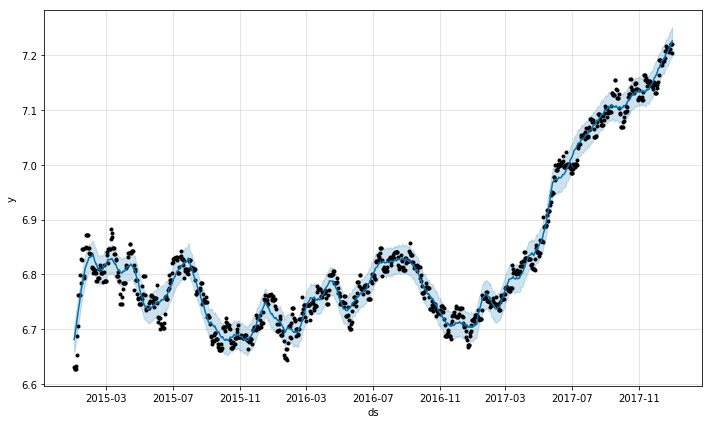

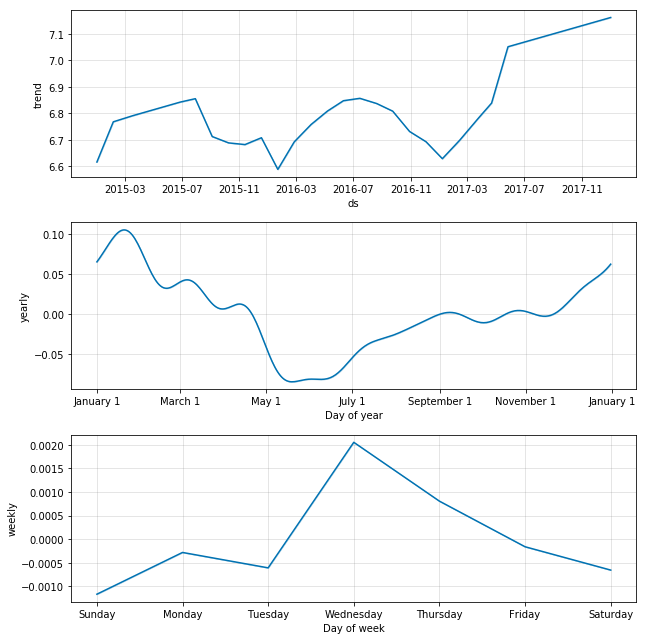

In [100]:
# Calling technical indicator functions for stock5_df

stock5_df = tech_ind.pcod(stock5_df)
stock5_df = tech_ind.hld(stock5_df)
stock5_df = tech_ind.stockRsi(stock5_df, numOfDays=14)
stock5_df = tech_ind.bbands(stock5_df, length=20, numsd=2) 
stock5_df = tech_ind.stma(stock5_df, numOfDays=10) # tentatively numOfDays=10 since this is a small dataset
stock5_df = tech_ind.ltma(stock5_df, numOfDays=20) # tentatively numOfDays=20 since this is a small dataset
stock5_df = tech_ind.ema(stock5_df, numOfDays=20)
stock5_df = tech_ind.scul(stock5_df)
stock5_df = tech_ind.scll(stock5_df)

#### Few modifications done to the below 3 functions
stock5_df = tech_ind.stma_cuts_ltma(stock5_df)
stock5_df = tech_ind.close_cuts_stma(stock5_df)
stock5_df = tech_ind.close_cuts_ltma(stock5_df)

stock5_df = tech_ind.daily_returns(stock5_df)
stock5_df = tech_ind.daily_returns_NSE(stock5_df)
stock5_df = tech_ind.daily_returns_SPY(stock5_df)
stock5_df = tech_ind.daily_returns_DOWJONES(stock5_df)
stock5_df = tech_ind.daily_returns_NASDAQ(stock5_df)

stock5_df = tech_ind.vwap(stock5_df)
stock5_df = tech_ind.price_movement(stock5_df)
stock5_df = tech_ind.beta_values(stock5_df)

#time-series prediction for the stock using prophet
stock5_df.reset_index(inplace = True)
stock5_df = stock5_df.rename(columns={'index':'Date'})
stock5_df, ts_data5 = tech_ind.TS_close_price(stock5_df)

# Writing the stock5_df data to .csv file
stock5_df.to_csv('{}'.format(tickers_for_model[4]+'.csv'))


In [101]:
stock5_df.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,SPY,DJ,...,dr_stock,dr_nse,dr_spy,dr_dj,dr_nasdaq,vwap,price_movmnt,beta,ds,TS_close_pr
0,2015-01-01,759.299988,761.900024,754.150024,758.450012,718.860352,372132.0,8395.450195,2058.199951,17832.990234,...,NaN,NaN,NaN,NaN,NaN,758.45,NaN,NaN,2015-01-01,797.200678
1,2015-01-02,757.000000,766.000000,752.650024,755.950012,716.490784,1207322.0,8395.450195,2058.199951,17832.990234,...,-0.003296,0.000000,0.000000,0.000000,0.000000,755.95,0.0,NaN,2015-01-02,801.770222
2,2015-01-03,757.000000,766.000000,752.650024,755.950012,716.490784,1207322.0,8395.450195,2058.199951,17832.990234,...,0.000000,0.000000,0.000000,0.000000,0.000000,755.95,1.0,NaN,2015-01-03,806.833275
3,2015-01-04,757.000000,766.000000,752.650024,755.950012,716.490784,1207322.0,8395.450195,2058.199951,17832.990234,...,0.000000,0.000000,0.000000,0.000000,0.000000,755.95,1.0,NaN,2015-01-04,811.992517
4,2015-01-05,759.750000,761.900024,755.099976,760.299988,720.613708,849252.0,8378.400391,2020.579956,17501.650391,...,0.005754,-0.002031,-0.018278,-0.018580,-0.015706,760.30,1.0,-2.8335,2015-01-05,818.392175
5,2015-01-06,767.000000,779.900024,755.400024,774.700012,734.262085,2738679.0,8127.350098,2002.609985,17371.640625,...,0.018940,-0.029964,-0.008893,-0.007428,-0.012859,774.70,1.0,-0.6321,2015-01-06,823.896467
6,2015-01-07,779.000000,806.799988,779.000000,801.900024,760.042297,3744143.0,8102.100098,2025.900024,17584.519531,...,0.035110,-0.003107,0.011630,0.012254,0.012570,801.90,1.0,-11.3012,2015-01-07,831.951062
7,2015-01-08,803.900024,825.000000,803.150024,817.049988,774.401489,3076833.0,8234.599609,2062.139893,17907.869141,...,0.018893,0.016354,0.017888,0.018388,0.018432,817.05,1.0,1.1552,2015-01-08,836.824552
8,2015-01-09,818.500000,868.400024,817.049988,864.599976,819.469421,3825060.0,8284.500000,2044.810059,17737.369141,...,0.058197,0.006060,-0.008404,-0.009521,-0.006782,864.60,1.0,9.6037,2015-01-09,841.952846
9,2015-01-10,818.500000,868.400024,817.049988,864.599976,819.469421,3825060.0,8284.500000,2044.810059,17737.369141,...,0.000000,0.000000,0.000000,0.000000,0.000000,864.60,1.0,NaN,2015-01-10,847.477145


Original 'Close' price data


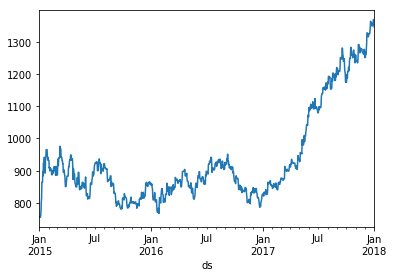

In [102]:
# time-series projections of the close price

print("Original 'Close' price data")
ts_data5.set_index('ds').y_orig.plot()


log-transformed 'Close' price data


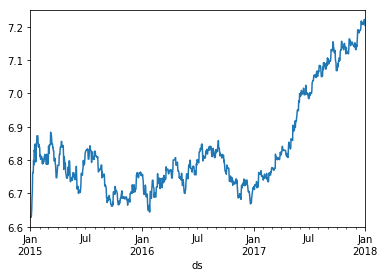

In [103]:
print("log-transformed 'Close' price data")
ts_data5.set_index('ds').y.plot()


time-series log-transformed 'Close' price data


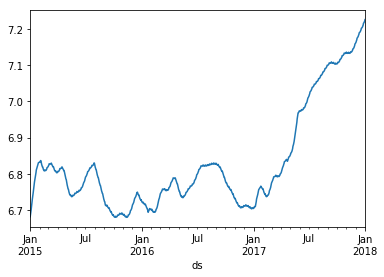

In [104]:
print("time-series log-transformed 'Close' price data")
ts_data5.set_index('ds').yhat.plot()

In [105]:
stock1_df

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,SPY,DJ,...,dr_stock,dr_nse,dr_spy,dr_dj,dr_nasdaq,vwap,price_movmnt,beta,ds,TS_close_pr
0,2015-01-01,229.000000,229.449997,227.500000,227.750000,217.230316,208341.0,8395.450195,2058.199951,17832.990234,...,NaN,NaN,NaN,NaN,NaN,227.75,NaN,NaN,2015-01-01,226.173274
1,2015-01-02,228.000000,231.699997,228.000000,230.949997,220.282516,582581.0,8395.450195,2058.199951,17832.990234,...,0.014051,0.000000,0.000000,0.000000,0.000000,230.95,1.0,NaN,2015-01-02,226.774322
2,2015-01-03,228.000000,231.699997,228.000000,230.949997,220.282516,582581.0,8395.450195,2058.199951,17832.990234,...,0.000000,0.000000,0.000000,0.000000,0.000000,230.95,1.0,NaN,2015-01-03,227.437515
3,2015-01-04,228.000000,231.699997,228.000000,230.949997,220.282516,582581.0,8395.450195,2058.199951,17832.990234,...,0.000000,0.000000,0.000000,0.000000,0.000000,230.95,1.0,NaN,2015-01-04,228.111087
4,2015-01-05,230.949997,233.300003,229.550003,230.649994,219.996368,967248.0,8378.400391,2020.579956,17501.650391,...,-0.001299,-0.002031,-0.018278,-0.018580,-0.015706,230.65,0.0,0.6396,2015-01-05,229.176521
5,2015-01-06,230.000000,230.000000,220.750000,222.149994,211.888992,1479156.0,8127.350098,2002.609985,17371.640625,...,-0.036852,-0.029964,-0.008893,-0.007428,-0.012859,222.15,0.0,1.2299,2015-01-06,229.379422
6,2015-01-07,222.000000,222.949997,218.100006,220.100006,209.933685,1172388.0,8102.100098,2025.900024,17584.519531,...,-0.009228,-0.003107,0.011630,0.012254,0.012570,220.10,0.0,2.9703,2015-01-07,230.284616
7,2015-01-08,221.949997,227.500000,221.199997,226.399994,215.942703,1084102.0,8234.599609,2062.139893,17907.869141,...,0.028623,0.016354,0.017888,0.018388,0.018432,226.40,1.0,1.7503,2015-01-08,231.263959
8,2015-01-09,226.699997,228.399994,222.050003,223.800003,213.462799,1225314.0,8284.500000,2044.810059,17737.369141,...,-0.011484,0.006060,-0.008404,-0.009521,-0.006782,223.80,0.0,-1.8951,2015-01-09,231.950265
9,2015-01-10,226.699997,228.399994,222.050003,223.800003,213.462799,1225314.0,8284.500000,2044.810059,17737.369141,...,0.000000,0.000000,0.000000,0.000000,0.000000,223.80,1.0,NaN,2015-01-10,232.691118


In [106]:
import seaborn as sns

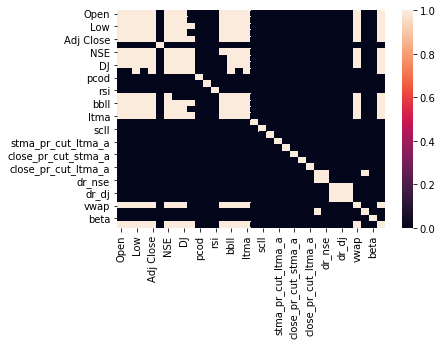

In [107]:
sns.heatmap (stock1_df.corr() > 0.6)

In [108]:
stock1_df.dropna(inplace=True)

In [109]:
stock1_df.corr() 

,Open,High,Low,Close,Adj Close,Volume,NSE,SPY,DJ,NASDAQ,...,close_pr_cut_ltma_a,dr_stock,dr_nse,dr_spy,dr_dj,dr_nasdaq,vwap,price_movmnt,beta,TS_close_pr
Open,1.000000,0.995465,0.994514,0.990468,0.987409,-0.017083,0.808041,0.631592,0.610730,0.599395,...,0.009458,-0.045708,0.019164,0.006489,0.011409,0.029040,0.990468,-0.049040,0.007345,0.979017
High,0.995465,1.000000,0.994823,0.995691,0.991837,0.009805,0.805033,0.627202,0.606425,0.594602,...,-0.007596,0.015565,0.040601,0.012090,0.017605,0.034108,0.995691,-0.003742,0.008139,0.979705
Low,0.994514,0.994823,1.000000,0.995887,0.993911,-0.021305,0.815158,0.642611,0.621730,0.609566,...,-0.025140,0.025449,0.061662,0.019982,0.025399,0.039730,0.995887,0.006418,0.009077,0.978401
Close,0.990468,0.995691,0.995887,1.000000,0.996610,-0.008832,0.809939,0.633359,0.612481,0.599741,...,-0.037168,0.078072,0.082342,0.023198,0.028936,0.042991,1.000000,0.046935,0.010948,0.978959
Adj Close,0.987409,0.991837,0.993911,0.996610,1.000000,-0.000768,0.839181,0.681918,0.661651,0.650591,...,-0.040546,0.076514,0.082403,0.025175,0.032731,0.043466,0.996610,0.045315,0.012891,0.977394
Volume,-0.017083,0.009805,-0.021305,-0.008832,-0.000768,1.000000,-0.009487,-0.011113,-0.022961,0.002091,...,-0.023647,0.114009,-0.006264,0.049988,0.050453,0.054275,-0.008832,0.032588,0.006965,-0.026067
NSE,0.808041,0.805033,0.815158,0.809939,0.839181,-0.009487,1.000000,0.921994,0.911139,0.922476,...,-0.046017,0.025240,0.074242,0.021007,0.037710,0.025372,0.809939,0.003501,0.028341,0.812327
SPY,0.631592,0.627202,0.642611,0.633359,0.681918,-0.011113,0.921994,1.000000,0.994980,0.988697,...,-0.064326,0.032746,0.074872,0.072992,0.090860,0.072150,0.633359,-0.000266,0.021100,0.644173
DJ,0.610730,0.606425,0.621730,0.612481,0.661651,-0.022961,0.911139,0.994980,1.000000,0.983036,...,-0.059151,0.031789,0.067590,0.064774,0.085626,0.061964,0.612481,-0.001765,0.021327,0.623964
NASDAQ,0.599395,0.594602,0.609566,0.599741,0.650591,0.002091,0.922476,0.988697,0.983036,1.000000,...,-0.055732,0.019905,0.061669,0.057847,0.074563,0.060213,0.599741,-0.006516,0.024973,0.609364


In [110]:
stock1_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'NSE',
       'SPY', 'DJ', 'NASDAQ', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_pr_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'vwap', 'price_movmnt', 'beta', 'ds', 'TS_close_pr'],
      dtype='object')

In [111]:
stock1_df.drop (['Open', 'High', 'Low','NSE','SPY', 'DJ', 'NASDAQ','ds'],axis = 1, inplace =True)

In [112]:
stock1_df.drop (['dr_nasdaq'],axis = 1, inplace =True)

In [113]:
stock1_df.drop (['stma','ltma','Volume'],axis = 1, inplace =True)

In [114]:
stock1_df.drop (['dr_dj'],axis = 1, inplace =True)

In [115]:
stock1_df.drop (['Close'],axis = 1, inplace =True)

In [116]:
stock1_df.drop (['vwap', 'Adj Close'],axis = 1, inplace =True)

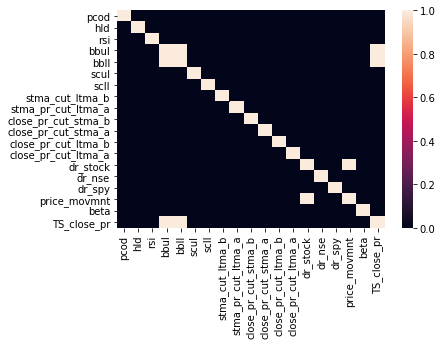

In [117]:
sns.heatmap (stock1_df.corr() > 0.6)

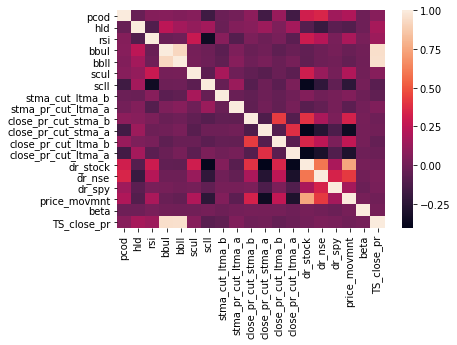

In [118]:
sns.heatmap (stock1_df.corr())

In [119]:
stock1_df.drop (['bbul','bbll','dr_stock'],axis = 1, inplace =True)

In [120]:
stock1_df.drop (['Date'],axis = 1, inplace =True)

In [121]:
y = stock1_df.price_movmnt.values
X = stock1_df.drop ('price_movmnt' , axis =1 ).values

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split (X, y , test_size = 0.3 , random_state = 42)




# Import suite of algorithms.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier

In [123]:
# Create objects of required models.
models = []
models.append(("LR",LogisticRegression()))
models.append(("GNB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
#models.append(("LDA",  LinearDiscriminantAnalysis()))
#models.append(("QDA",  QuadraticDiscriminantAnalysis()))
models.append(("AdaBoost", AdaBoostClassifier()))
models.append(("SVM Linear",SVC(kernel="linear")))
#models.append(("SVM RBF",SVC(kernel="rbf")))
models.append(("Random Forest",  RandomForestClassifier()))
models.append(("Bagging",BaggingClassifier()))
#models.append(("Calibrated classifier",CalibratedClassifierCV()))
models.append(("GradientBoosting",GradientBoostingClassifier()))
#models.append(("LinearSVC",LinearSVC()))
models.append(("Ridge",RidgeClassifier()))
models.append(("MLP",MLPClassifier()))

In [124]:
# Find accuracy of models.
results = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    results.append(tuple([name,cv_result.mean(), cv_result.std()]))
  
results.sort(key=lambda x: x[1], reverse = True)    
for i in range(len(results)):
    print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[i][0] , results[i][1] * 100, results[i][2] * 100))
    



Bagging              99.80 (+/-) 0.59 
GradientBoosting     99.80 (+/-) 0.59 
DecisionTree         99.60 (+/-) 0.79 
Random Forest        93.86 (+/-) 4.34 
GNB                  72.86 (+/-) 7.36 
Ridge                71.28 (+/-) 6.46 
LR                   70.08 (+/-) 7.64 
SVM Linear           69.88 (+/-) 6.56 
AdaBoost             69.88 (+/-) 6.04 
MLP                  61.37 (+/-) 10.26 
KNN                  51.50 (+/-) 6.47 
